In [17]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [18]:
data = pd.read_csv("daily_minimum_temperatures.csv", sep=",")
print(data.shape)
data.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


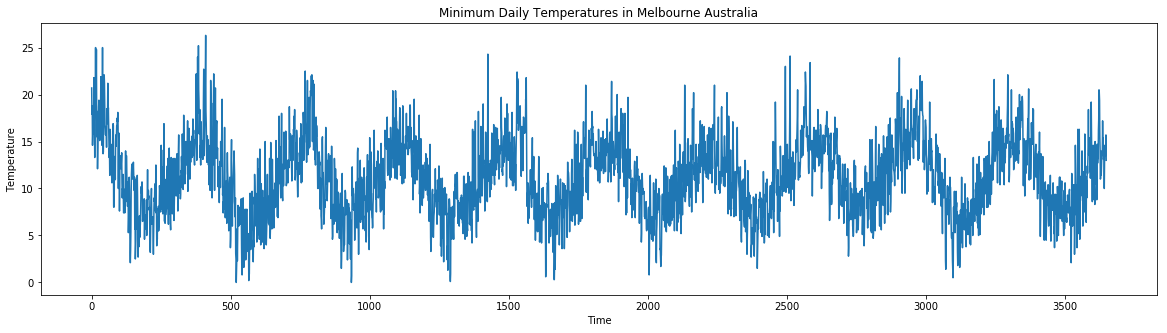

In [19]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [20]:
train_percentage = 0.67
train_size = int(len(data)*train_percentage)

train = data[:train_size]
test = data[train_size:]

print(train.shape)
train.head()

(2445, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [76]:
#ARIMA(p,d,q)
# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.

model = ARIMA(train.Temp, order=(5,1,2))
results = model.fit(disp=-1)

In [77]:
results.forecast(4) #(forcast, stderr, conf_int) https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html

(array([9.03575949, 8.28822945, 8.11533949, 8.09274963]),
 array([2.44749475, 2.84433481, 2.9108981 , 2.93358086]),
 array([[ 4.23875793, 13.83276104],
        [ 2.71343566, 13.86302325],
        [ 2.41008406, 13.82059493],
        [ 2.3430368 , 13.84246246]]))

In [78]:
index_start = len(train)
index_end = len(train) + len(test)
predictions = results.forecast(index_end - index_start)

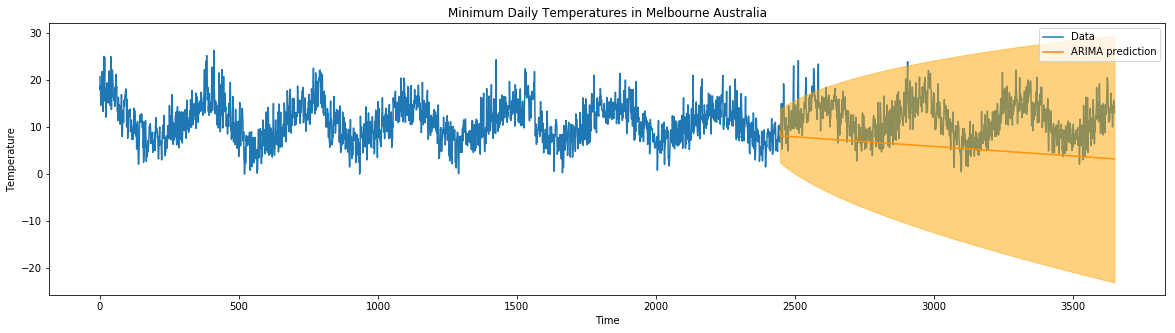

In [79]:
index_start = len(train)
index_end = len(train) + len(test)
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data", zorder = 1)
plt.plot(range(index_start, index_end), predictions[0], label="ARIMA prediction", zorder = 2)
plt.fill_between(range(len(train), len(train) + len(test)), [conf_int[0] for conf_int in predictions[2]], [conf_int[1] for conf_int in predictions[2]], alpha=0.5, color ="orange", zorder = 3)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [80]:
mean_squared_error(test.Temp, predictions[0])

52.073796427729675